In [79]:
from transformers import SegformerFeatureExtractor
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
import pathlib
import matplotlib.pyplot as plt

In [93]:
class Dataset(Dataset):
    CLASSES = [
        "clean",
        "transparent",
        "semi-transparent",
        "opaque",
    ]

    def __init__(
        self,
        dataset_root: pathlib.Path,
        dataset_txt_file,
        feature_extractor,
    ):
        list_of_files = open(str(dataset_root / dataset_txt_file)).readlines()
        self.list_of_images = [f"{dataset_root}{row.split(',')[0].strip()}" for row in list_of_files]
        self.list_of_labels = [f"{dataset_root}{row.split(',')[1].strip()}" for row in list_of_files]
        self.feature_extractor = feature_extractor

    def __getitem__(self, i):
        # read data
        img = np.array(Image.open(self.list_of_images[i]).resize((512, 512)))
        lbl = np.array(Image.open(self.list_of_labels[i]).resize((512, 512)))
        # randomly crop + pad both image and segmentation map to same size
        encoded_inputs = self.feature_extractor(img, lbl, return_tensors="pt")

        for k, v in encoded_inputs.items():
            encoded_inputs[k].squeeze_()  # remove batch dimension

        return encoded_inputs, img

    def __len__(self):
        return len(self.list_of_images)

In [94]:
model_name="nvidia/segformer-b0-finetuned-ade-512-512"
image_size=512
feature_extractor = SegformerFeatureExtractor.from_pretrained(model_name)
feature_extractor.do_reduce_labels = False
feature_extractor.size = image_size  # Maybe put there 512

/home/fberanek/Desktop/learning/my_articles/woodscape_revision/venv/lib/python3.10/site-packages/transformers/models/segformer/feature_extraction_segformer.py:28: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/home/fberanek/Desktop/learning/my_articles/woodscape_revision/venv/lib/python3.10/site-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [95]:
train_dataset_root = pathlib.Path(r"/home/fberanek/Desktop/datasets/segmentation/semantic/new_soiling/train")
train_txt_filename = "train_correct_clear_strict_files.txt"

train_dataset = Dataset(
    dataset_root=train_dataset_root, dataset_txt_file=train_txt_filename, feature_extractor=feature_extractor
)

In [132]:
tansformed_image, img = train_dataset.__getitem__(679)

In [133]:
tansformed_image_new =tansformed_image["pixel_values"]

In [134]:
min_val = tansformed_image["pixel_values"].min()
max_val = tansformed_image["pixel_values"].max()
min_val

tensor(-2.1179)

In [135]:
max_val

tensor(2.6400)

In [136]:
reconstructed_img = np.moveaxis((((tansformed_image_new+abs(min_val))/(max_val-min_val))*255).numpy().astype(np.uint8),0,-1)

In [137]:
reconstructed_img

array([[[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]],

       [[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]],

       [[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]],

       ...,

       [[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]],

       [[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]],

       [[ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16],
        ...,
        [ 0,  4, 16],
        [ 0,  4, 16],
        [ 0,  4, 16]]], dtype=uint8)

In [138]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

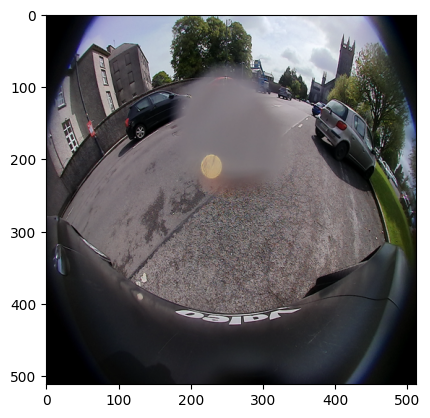

In [139]:
plt.figure()
plt.imshow(img)
plt.show()

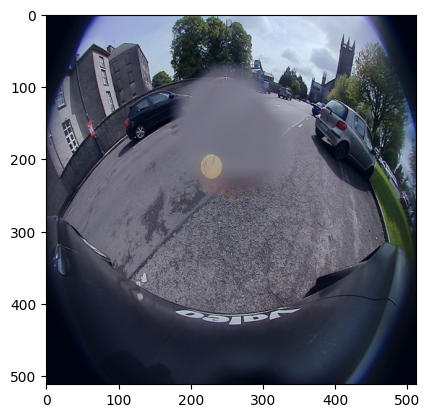

In [140]:
plt.figure()
plt.imshow(reconstructed_img)
plt.show()

In [23]:
arr = np.array([[[2,45,99],[64,255,128]],[[24,72,168],[97,201,146]]], dtype = np.uint8)
arr.shape

(2, 2, 3)

In [27]:
encoded_inputs = feature_extractor(arr, return_tensors="pt")
encoded_inputs

{'pixel_values': tensor([[[[-2.0837, -2.0837, -2.0837,  ..., -1.0219, -1.0219, -1.0219],
          [-2.0837, -2.0837, -2.0837,  ..., -1.0219, -1.0219, -1.0219],
          [-2.0837, -2.0837, -2.0837,  ..., -1.0219, -1.0219, -1.0219],
          ...,
          [-1.7069, -1.7069, -1.7069,  ..., -0.4568, -0.4568, -0.4568],
          [-1.7069, -1.7069, -1.7069,  ..., -0.4568, -0.4568, -0.4568],
          [-1.7069, -1.7069, -1.7069,  ..., -0.4568, -0.4568, -0.4568]],

         [[-1.2479, -1.2479, -1.2479,  ...,  2.4286,  2.4286,  2.4286],
          [-1.2479, -1.2479, -1.2479,  ...,  2.4286,  2.4286,  2.4286],
          [-1.2479, -1.2479, -1.2479,  ...,  2.4286,  2.4286,  2.4286],
          ...,
          [-0.7752, -0.7752, -0.7752,  ...,  1.4832,  1.4832,  1.4832],
          [-0.7752, -0.7752, -0.7752,  ...,  1.4832,  1.4832,  1.4832],
          [-0.7752, -0.7752, -0.7752,  ...,  1.4832,  1.4832,  1.4832]],

         [[-0.0790, -0.0790, -0.0790,  ...,  0.4265,  0.4265,  0.4265],
          [-0

In [29]:
encoded_inputs["pixel_values"].shape

torch.Size([1, 3, 512, 512])

In [31]:
for k, v in encoded_inputs.items():
    encoded_inputs[k].squeeze_()  # remove batch dimension
encoded_inputs["pixel_values"].shape

torch.Size([3, 512, 512])